In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import scipy.optimize

In [3]:
from alignment.constants import result_cols, runs

In [4]:
import uncertainties.unumpy as unp

In [5]:
runs.keys()

dict_keys([3443, 3444, 3445, 3446])

In [6]:
data_sample = "separate"

In [7]:
extras = ["all", "none"]

In [8]:
result_tables = {}
for run in list(runs.keys()) + extras:    
    result_tables[run] = pd.read_pickle(f"../alignment/results/{data_sample}/{run}/results_layer/result_table.pkl").transpose()
    
result_tables["all"].transpose()

,$x$ [$\mu m$],$y$ [$\mu m$],$z$ [$\mu m$],$\alpha$ [mrad],$\beta$ [mrad],$\gamma$ [mrad]
L0,-106+/-26,-141+/-18,0+/-32,0.0+/-0.6,0.0+/-0.6,0.0+/-0.6
L1,-35+/-18,1+/-18,0+/-32,0.0+/-0.6,0.0+/-0.6,0.0+/-0.6
L2,141+/-26,140+/-18,0+/-32,0.0+/-0.6,0.0+/-0.6,0.0+/-0.6


In [9]:
result_tables["none"].transpose()

,$x$ [$\mu m$],$y$ [$\mu m$],$z$ [$\mu m$],$\alpha$ [mrad],$\beta$ [mrad],$\gamma$ [mrad]
L0,(0+/-7)e+01,(0+/-7)e+01,(0+/-7)e+01,0.0+/-1.4,0.0+/-1.4,0.0+/-1.4
L1,(0+/-7)e+01,(0+/-7)e+01,(0+/-7)e+01,0.0+/-1.4,0.0+/-1.4,0.0+/-1.4
L2,(0+/-7)e+01,(0+/-7)e+01,(0+/-7)e+01,0.0+/-1.4,0.0+/-1.4,0.0+/-1.4


In [10]:
labels = {
    0: r"$x$ [$\mu$ m]",
    1: r"$y$ [$\mu$ m]",
    2: r"$z$ [$\mu$ m]",
    3: r"$\alpha$ [mrad]",
    4: r"$\beta$ [mrad]",
    5: r"$\gamma$ [mrad]",
}

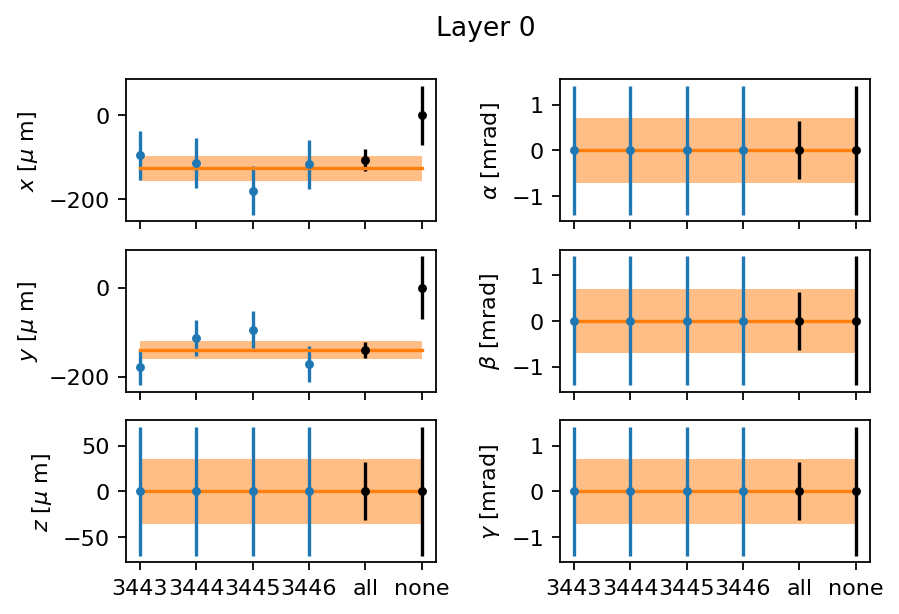

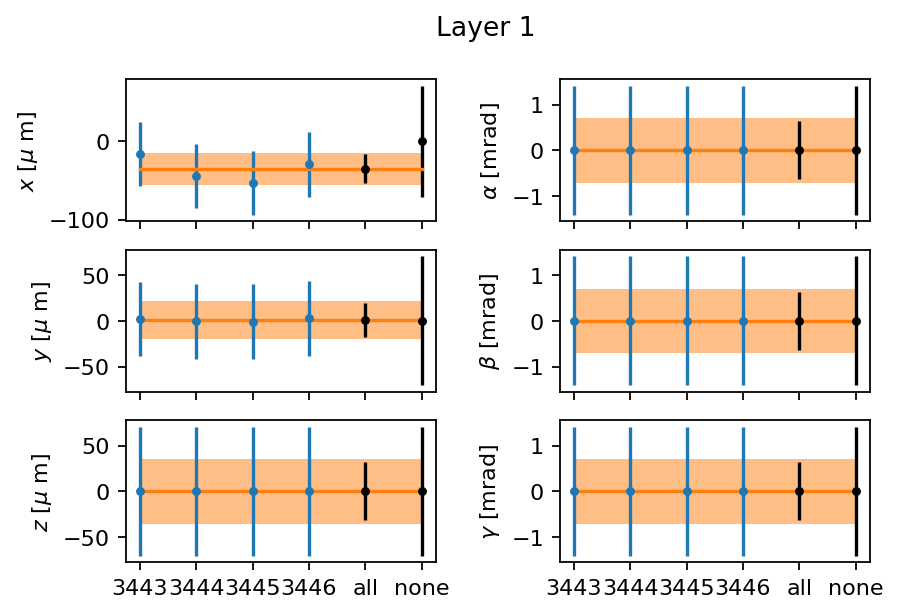

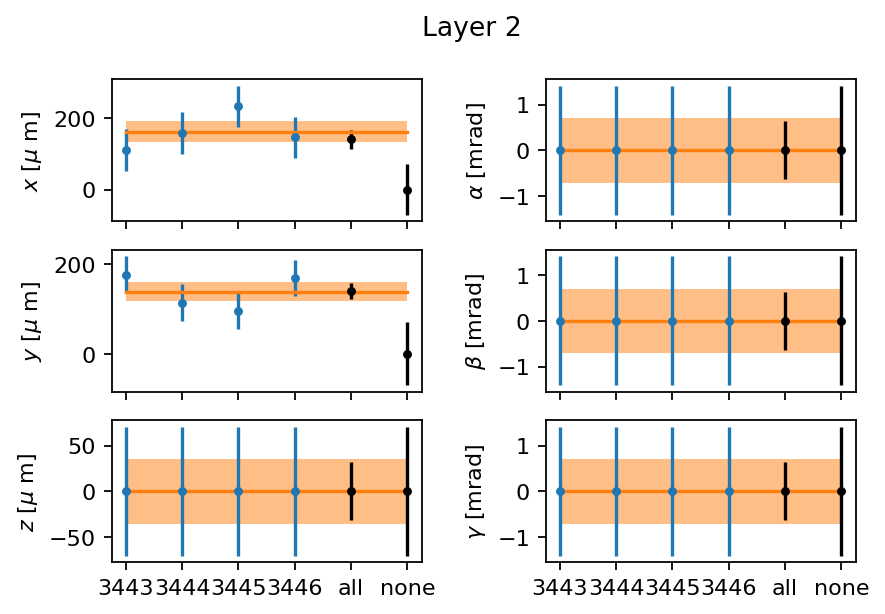

In [11]:
for layer in [0, 1, 2]:

    fig, axs = plt.subplots(3, 2, dpi=160, sharex=True, sharey=False, gridspec_kw={"wspace": 0.4, "hspace": 0.2})

    for i in range(3):
        axs[i, 0].errorbar(
            range(len(runs)), 
            [unp.nominal_values(result_tables[run][f"L{layer}"][i]) for run in runs],
            yerr=[unp.std_devs(result_tables[run][f"L{layer}"][i]) for run in runs],
            marker=".", ls="",
        )

        axs[i, 0].errorbar(
            range(len(runs), len(runs) + len(extras)), 
            [unp.nominal_values(result_tables[run][f"L{layer}"][i]) for run in extras],
            yerr=[unp.std_devs(result_tables[run][f"L{layer}"][i]) for run in extras],
            marker=".", ls="", color="black"
        )

        axs[i, 0].set_xticks(range(len(runs) + len(extras)), list(runs.keys()) + extras)
        axs[i, 0].set_ylabel(labels[i])

        avg = sum([result_tables[run][f"L{layer}"][i] for run in runs]) / len(runs)
        axs[i, 0].plot(range(len(runs) + len(extras)), [unp.nominal_values(avg) for _ in range(len(runs) + len(extras))],
                      color="tab:orange")
        axs[i, 0].fill_between(
            range(len(runs) + len(extras)),
            [unp.nominal_values(avg) - unp.std_devs(avg) for _ in range(len(runs) + len(extras))],
            [unp.nominal_values(avg) + unp.std_devs(avg) for _ in range(len(runs) + len(extras))],
            alpha=0.5, color="tab:orange", lw=0,
        )

    for i in range(3):
        axs[i, 1].errorbar(
            range(len(runs)), 
            [unp.nominal_values(result_tables[run][f"L{layer}"][i+3]) for run in runs],
            yerr=[unp.std_devs(result_tables[run][f"L{layer}"][i+3]) for run in runs],
            marker=".", ls="",
        )

        axs[i, 1].errorbar(
            range(len(runs), len(runs) + len(extras)), 
            [unp.nominal_values(result_tables[run][f"L{layer}"][i+3]) for run in extras],
            yerr=[unp.std_devs(result_tables[run][f"L{layer}"][i+3]) for run in extras],
            marker=".", ls="", color="black"
        )

        axs[i, 1].set_xticks(range(len(runs) + len(extras)), list(runs.keys()) + extras)
        axs[i, 1].set_ylabel(labels[i+3])

        avg = sum([result_tables[run][f"L{layer}"][i+3] for run in runs]) / len(runs)
        axs[i, 1].plot(range(len(runs) + len(extras)), [unp.nominal_values(avg) for _ in range(len(runs) + len(extras))],
                      color="tab:orange")
        axs[i, 1].fill_between(
            range(len(runs) + len(extras)),
            [unp.nominal_values(avg) - unp.std_devs(avg) for _ in range(len(runs) + len(extras))],
            [unp.nominal_values(avg) + unp.std_devs(avg) for _ in range(len(runs) + len(extras))],
            alpha=0.5, color="tab:orange", lw=0,
        )

    fig.suptitle(f"Layer {layer}")

    plt.show()
    plt.close()

In [12]:
result_tables = {}
for run in list(runs.keys()) + extras:    
    result_tables[run] = pd.read_pickle(f"../alignment/results/{data_sample}/{run}/results_module/result_table.pkl").transpose()
    
result_tables["none"].transpose()

,$x$ [$\mu m$],$y$ [$\mu m$],$z$ [$\mu m$],$\alpha$ [mrad],$\beta$ [mrad],$\gamma$ [mrad]
L0M0,(0+/-7)e+01,(0+/-7)e+01,(0+/-7)e+01,0.0+/-1.4,0.0+/-1.4,0.0+/-1.4
L1M0,(0+/-7)e+01,(0+/-7)e+01,(0+/-7)e+01,0.0+/-1.4,0.0+/-1.4,0.0+/-1.4
L2M0,(0+/-7)e+01,(0+/-7)e+01,(0+/-7)e+01,0.0+/-1.4,0.0+/-1.4,0.0+/-1.4
L0M1,(0+/-7)e+01,(0+/-7)e+01,(0+/-7)e+01,0.0+/-1.4,0.0+/-1.4,0.0+/-1.4
L1M1,(0+/-7)e+01,(0+/-7)e+01,(0+/-7)e+01,0.0+/-1.4,0.0+/-1.4,0.0+/-1.4
L2M1,(0+/-7)e+01,(0+/-7)e+01,(0+/-7)e+01,0.0+/-1.4,0.0+/-1.4,0.0+/-1.4
L0M2,(0+/-7)e+01,(0+/-7)e+01,(0+/-7)e+01,0.0+/-1.4,0.0+/-1.4,0.0+/-1.4
L1M2,(0+/-7)e+01,(0+/-7)e+01,(0+/-7)e+01,0.0+/-1.4,0.0+/-1.4,0.0+/-1.4
L2M2,(0+/-7)e+01,(0+/-7)e+01,(0+/-7)e+01,0.0+/-1.4,0.0+/-1.4,0.0+/-1.4
L0M3,(0+/-7)e+01,(0+/-7)e+01,(0+/-7)e+01,0.0+/-1.4,0.0+/-1.4,0.0+/-1.4


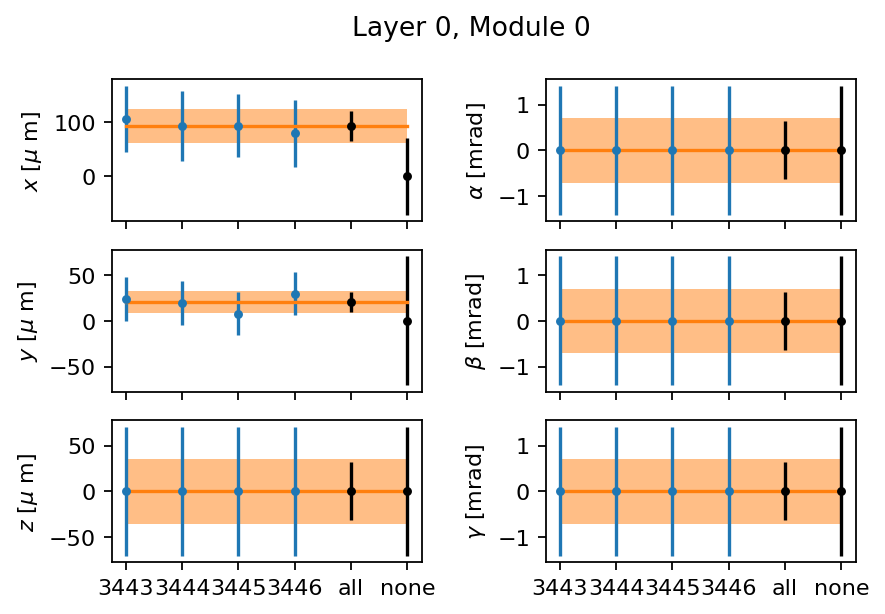

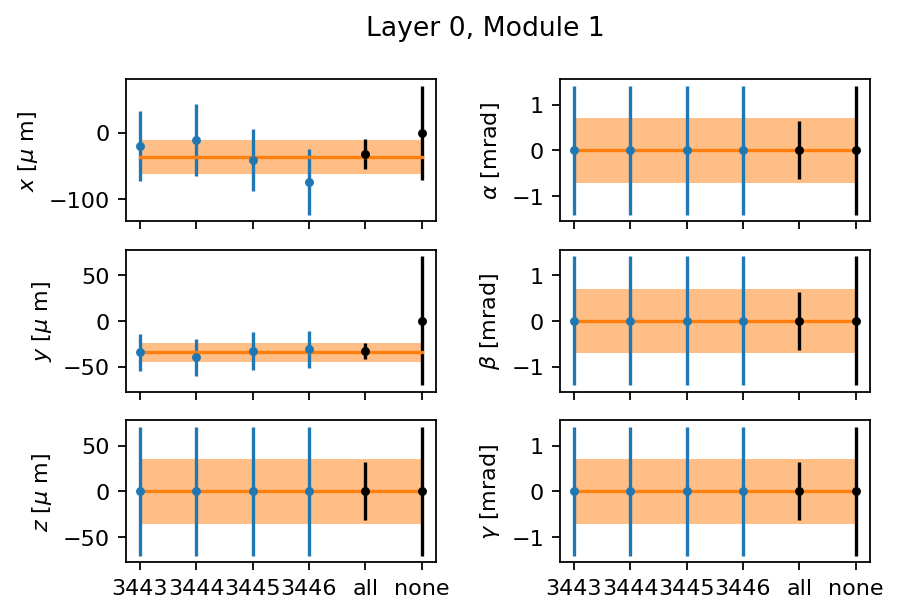

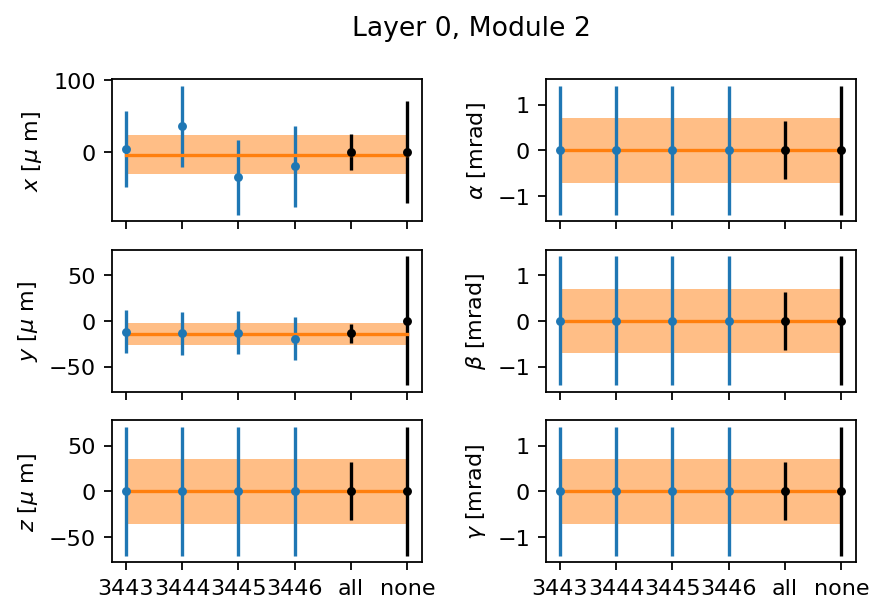

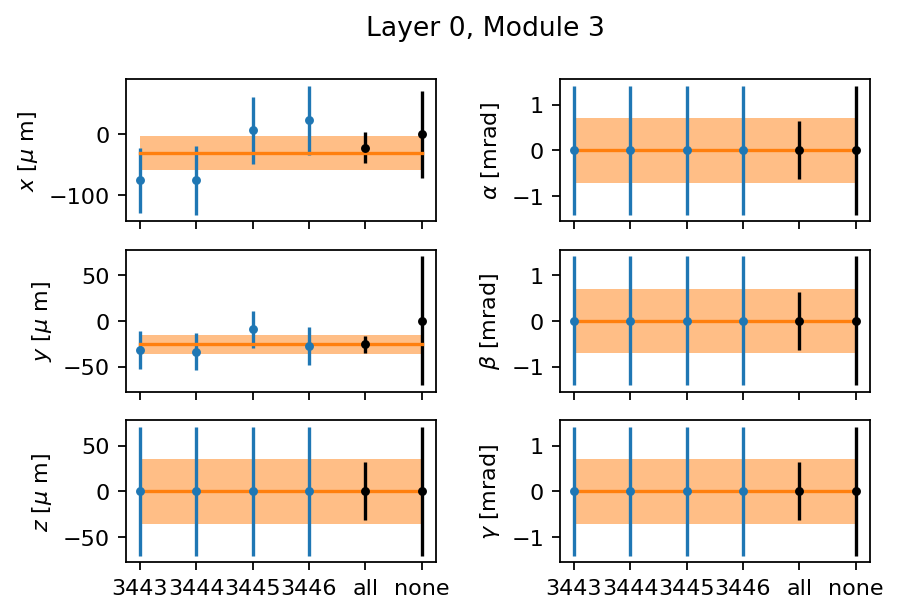

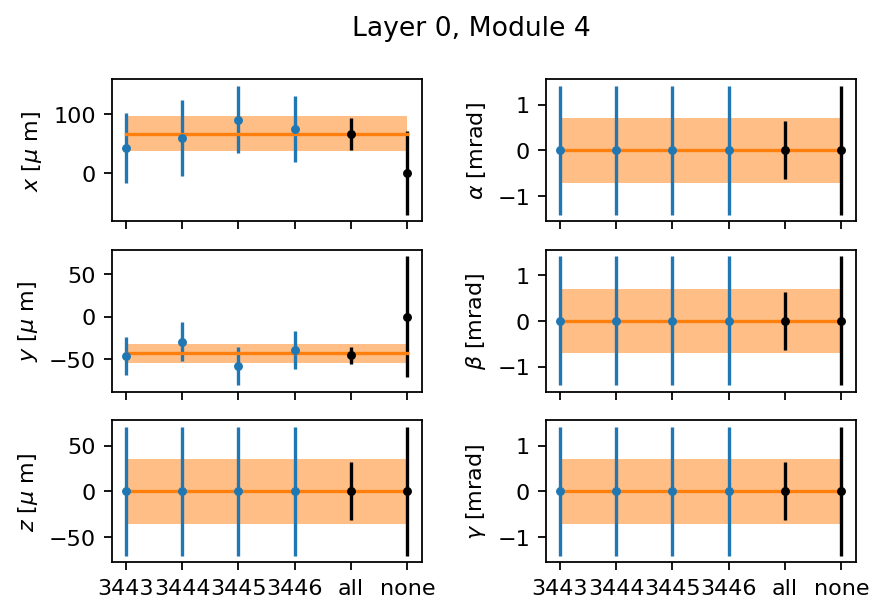

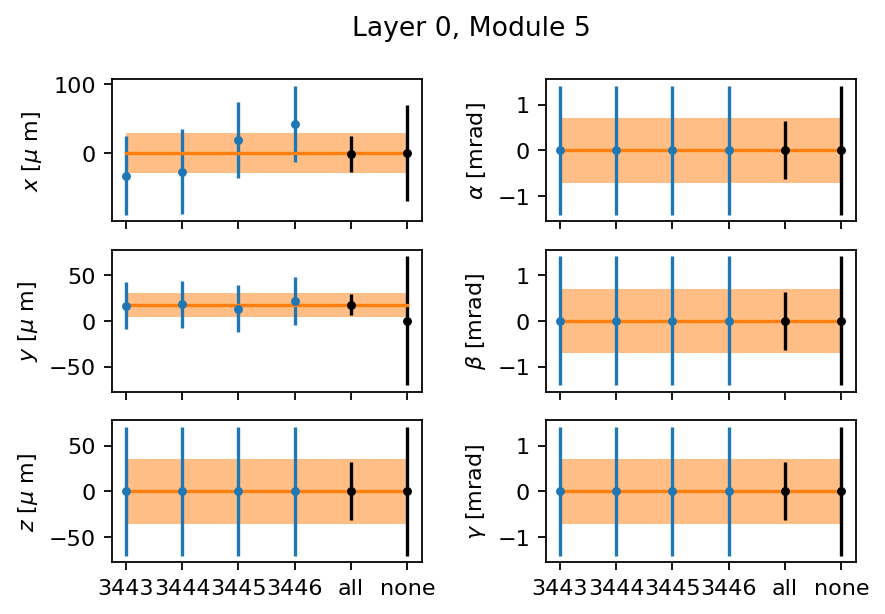

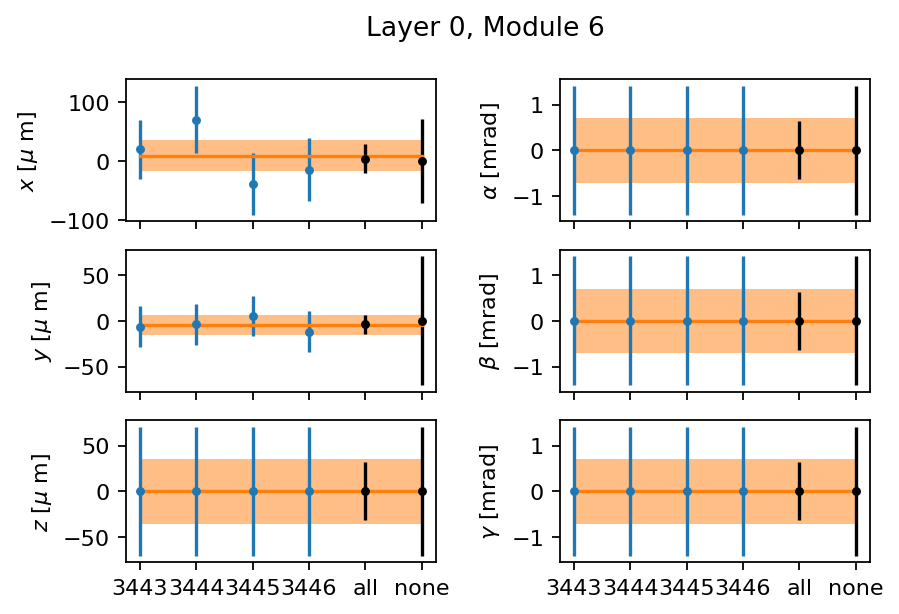

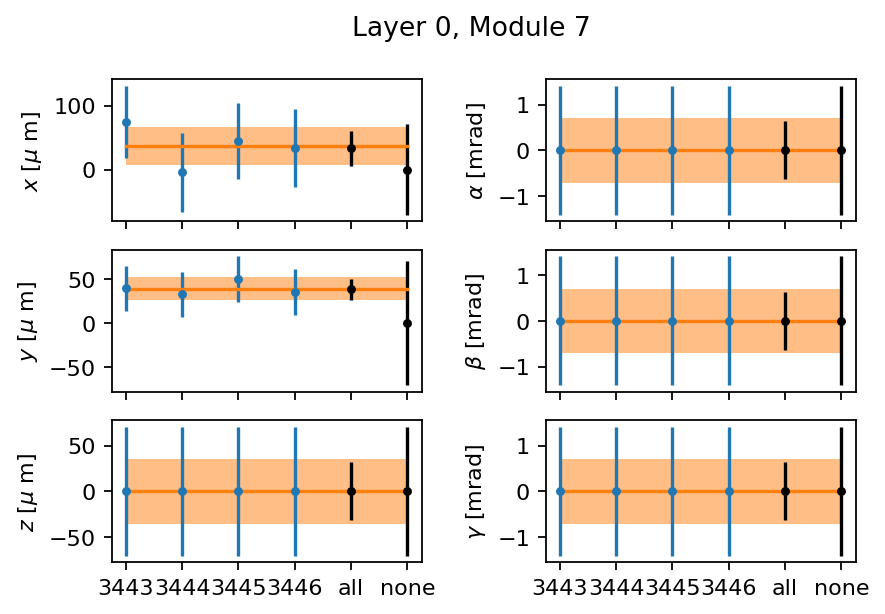

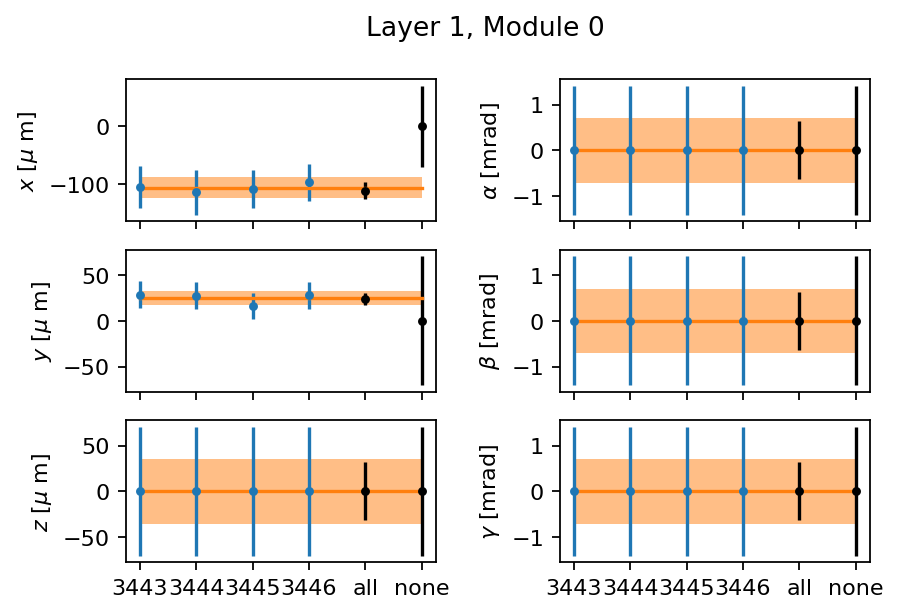

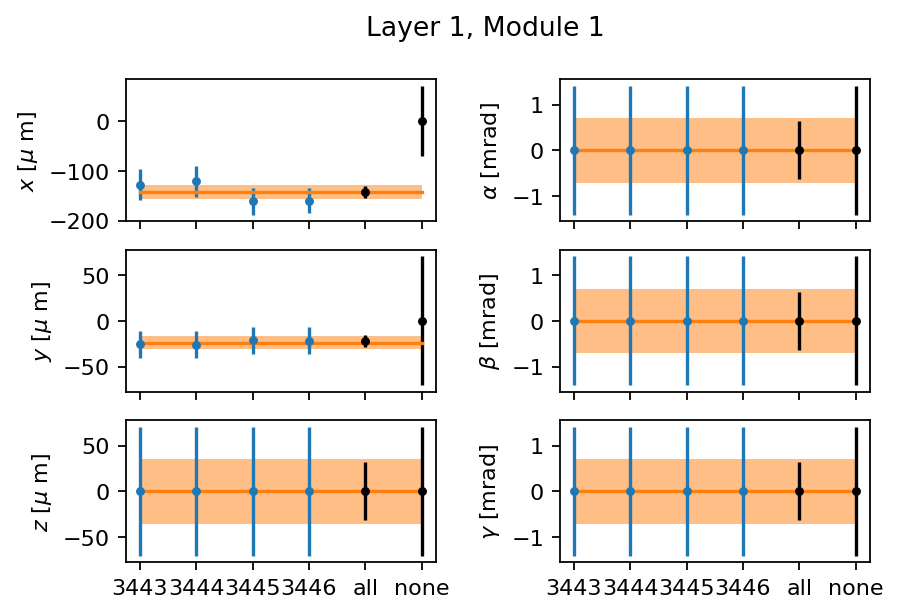

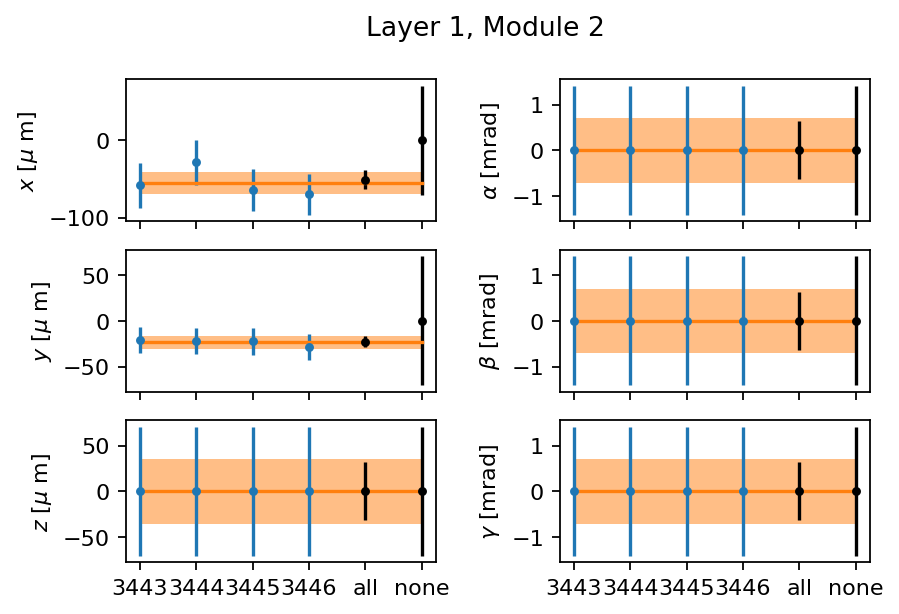

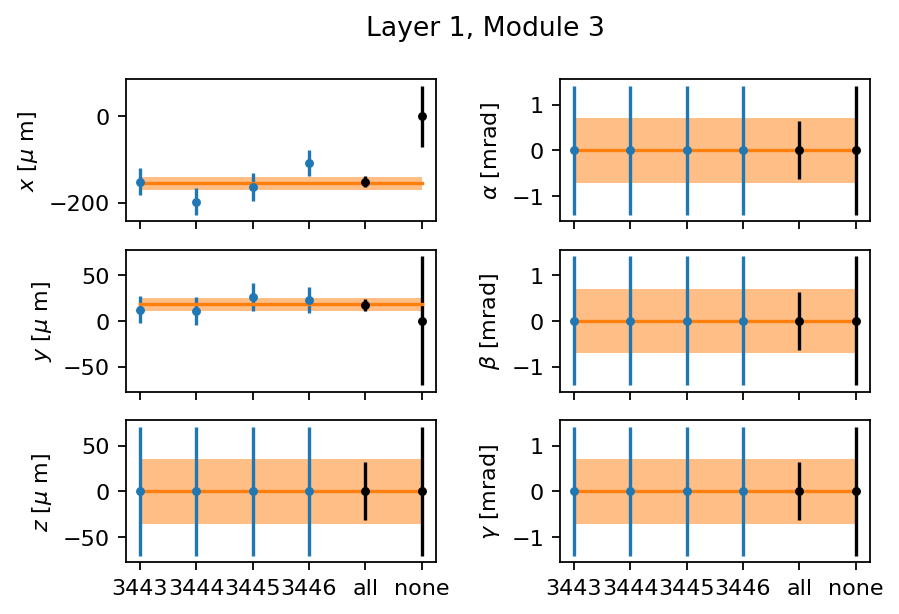

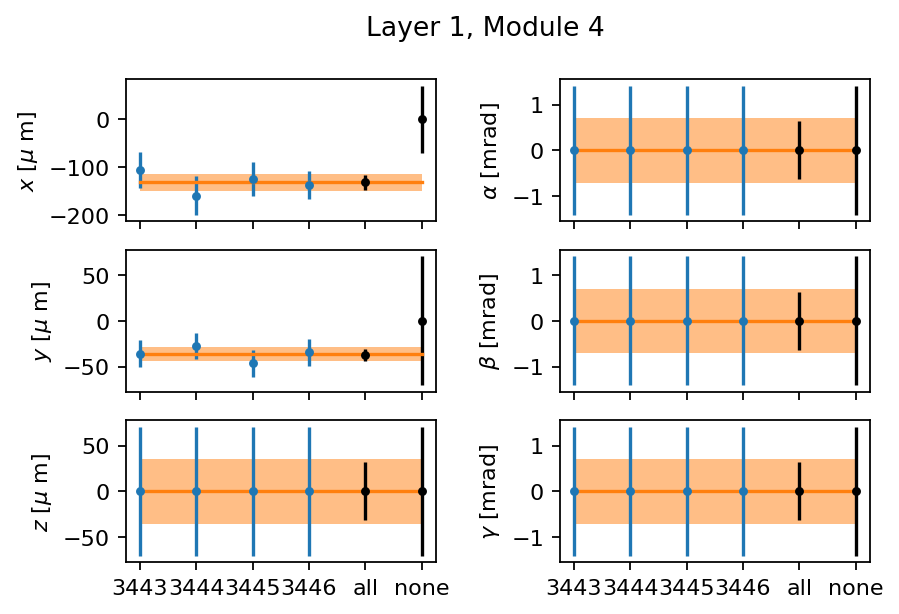

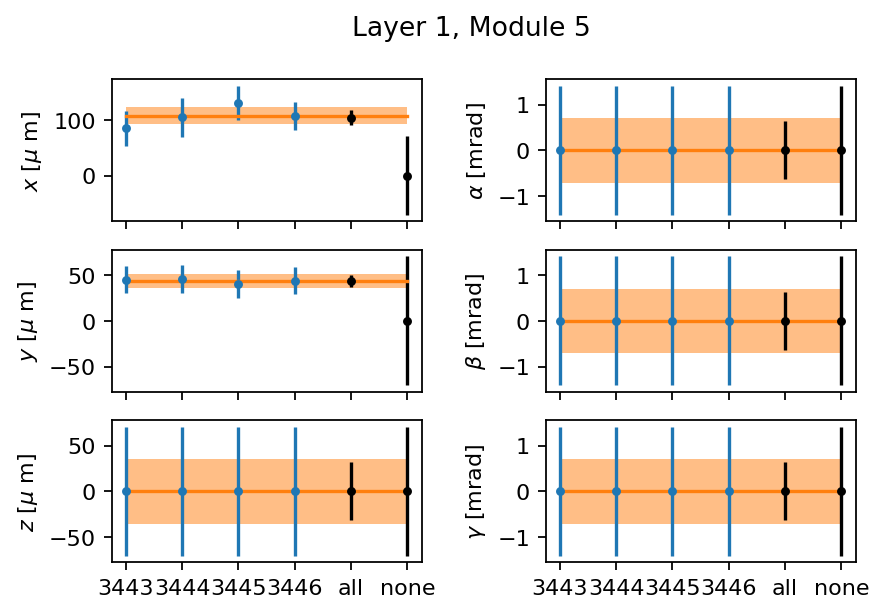

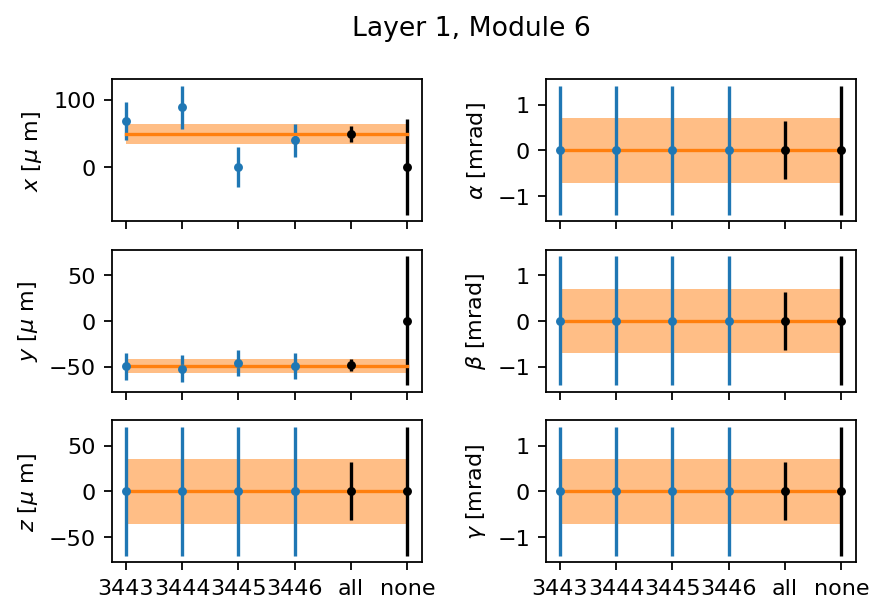

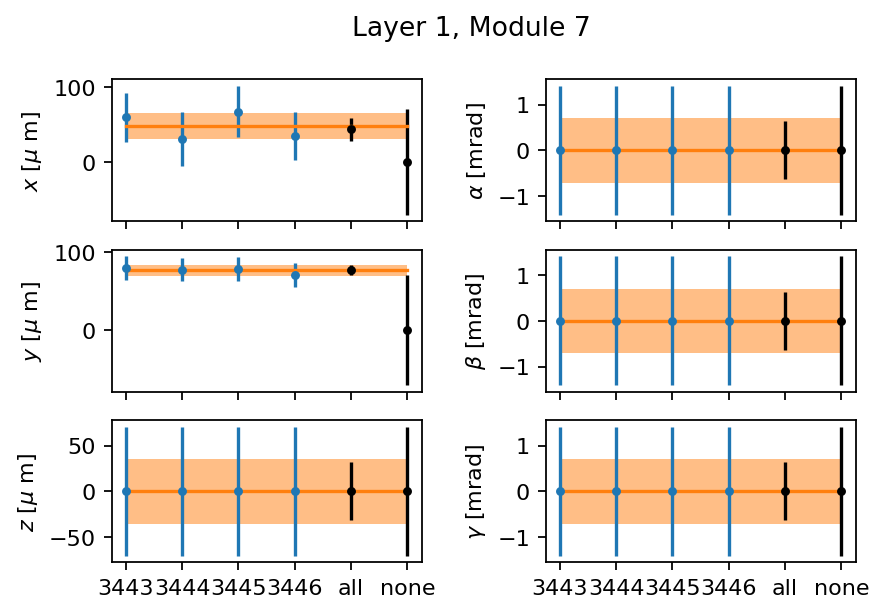

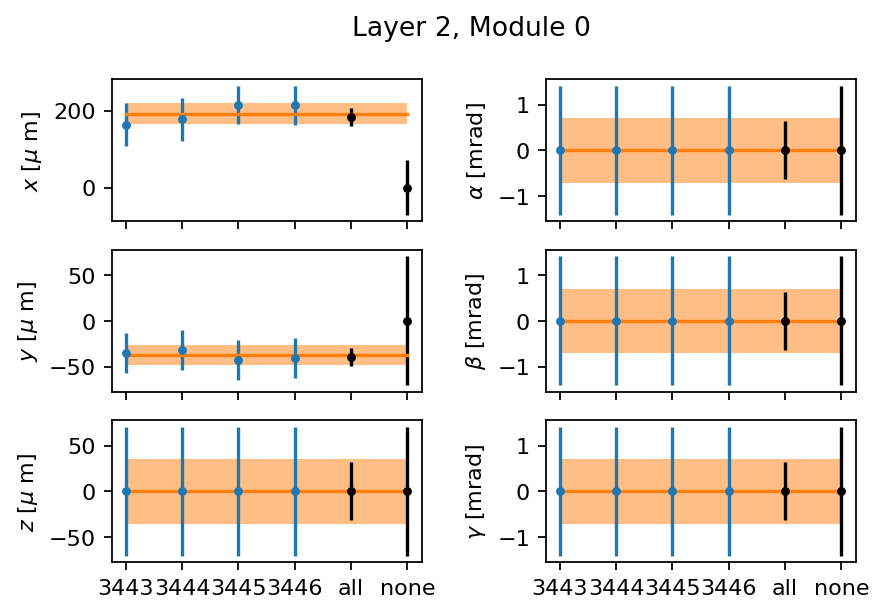

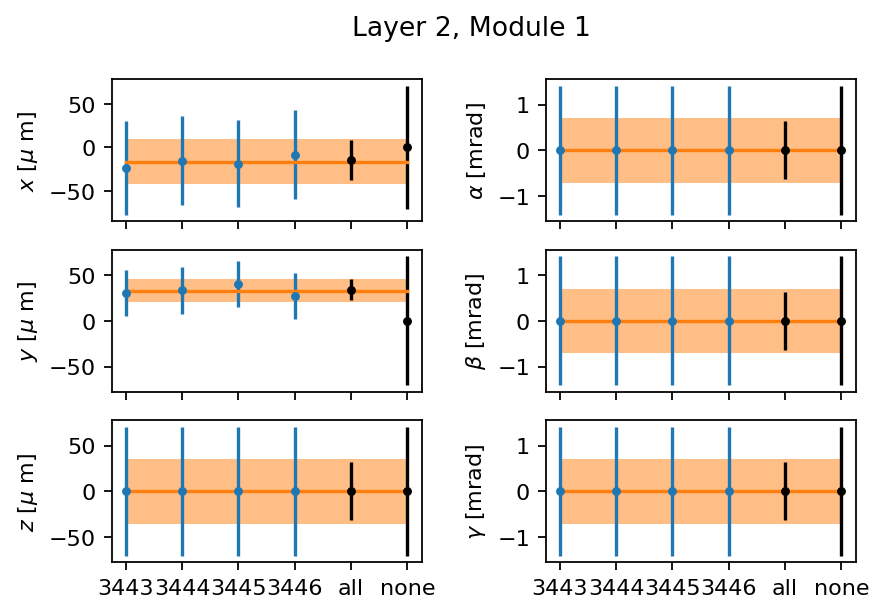

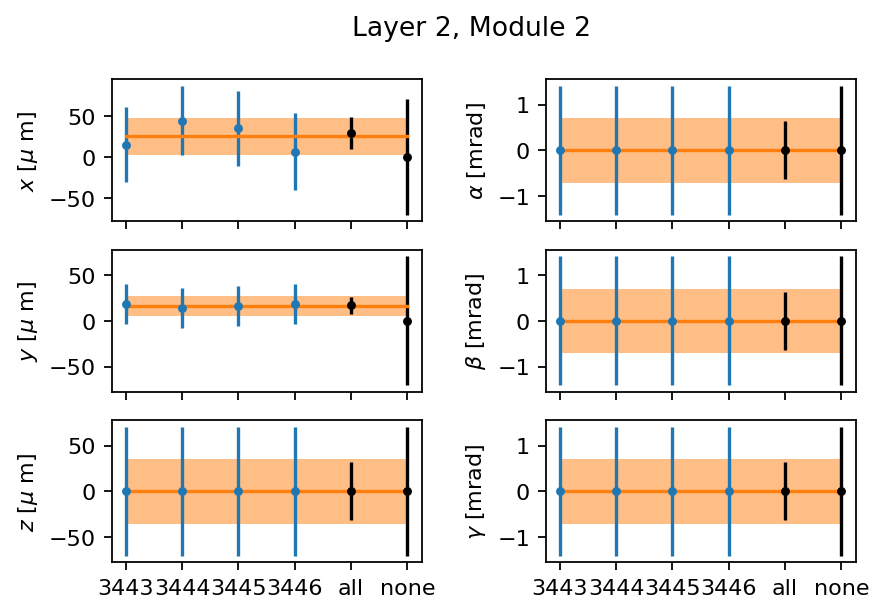

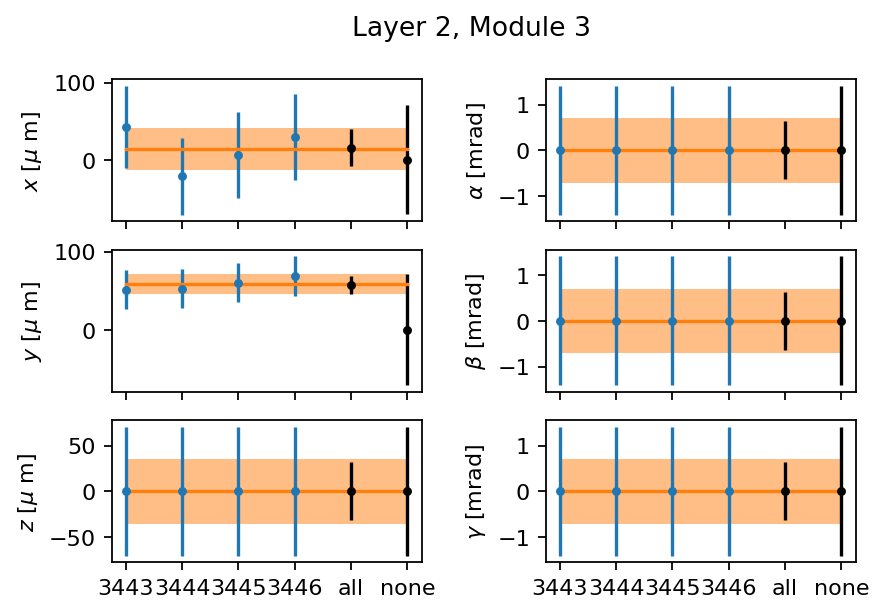

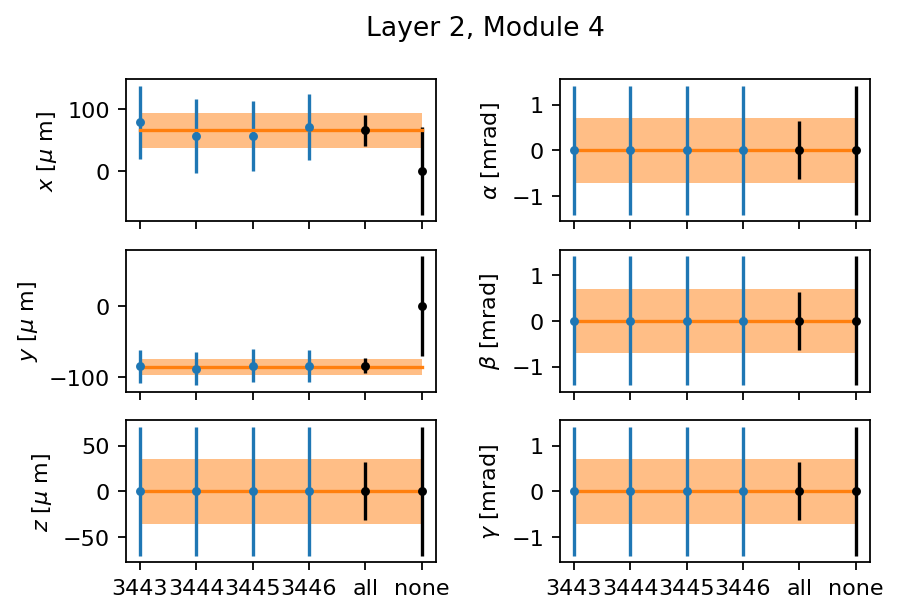

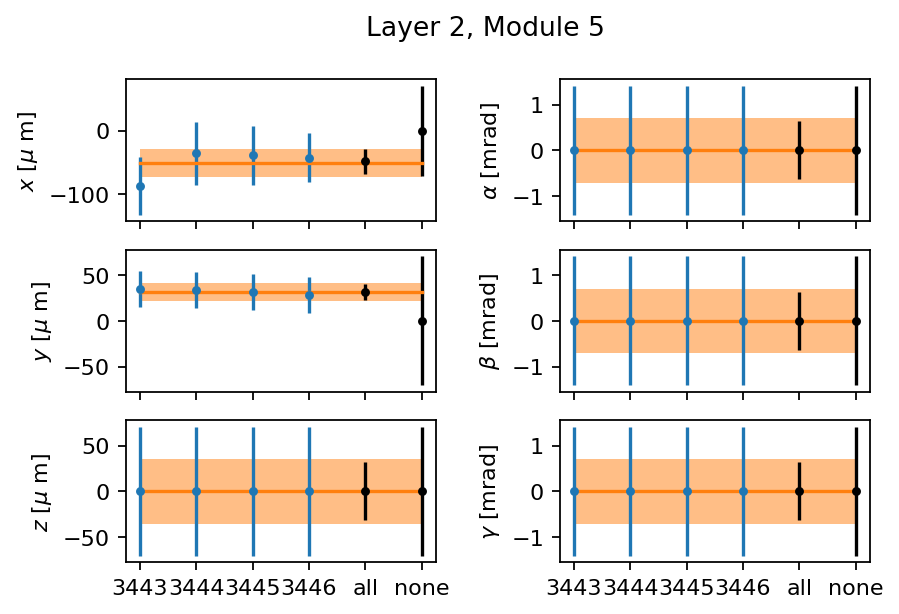

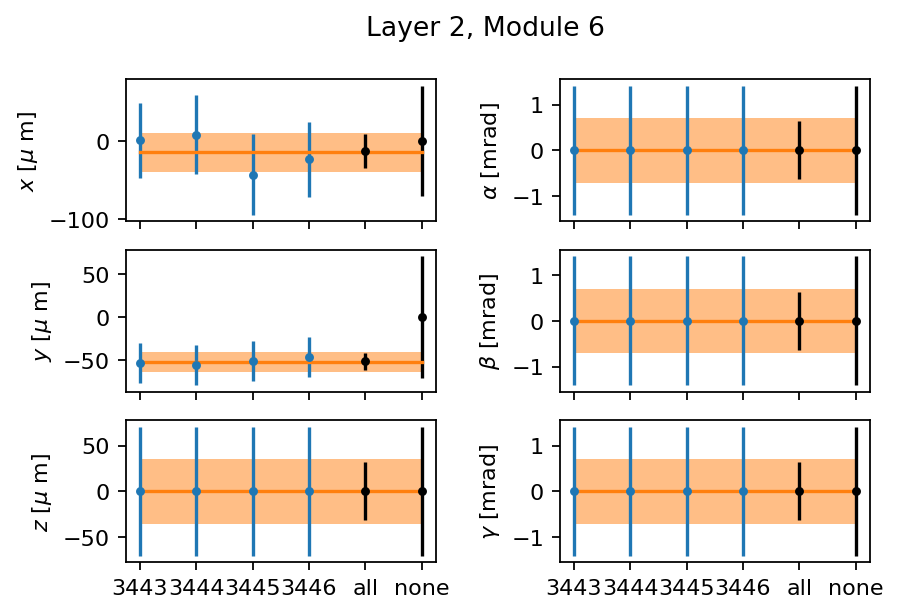

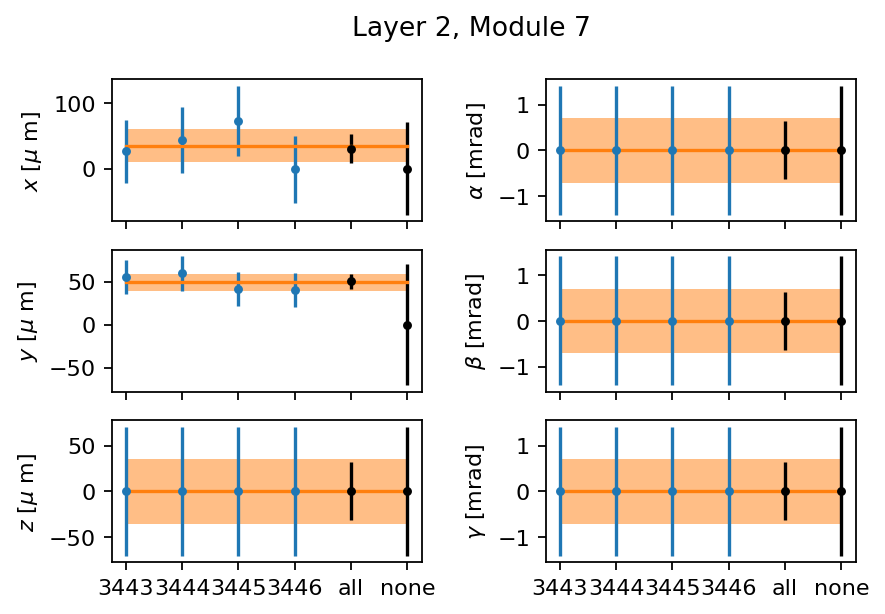

In [13]:
for layer in [0, 1, 2]:

    for module in [0, 1, 2, 3, 4, 5, 6, 7]:

        fig, axs = plt.subplots(3, 2, dpi=160, sharex=True, sharey=False, gridspec_kw={"wspace": 0.4, "hspace": 0.2})

        for i in range(3):
            axs[i, 0].errorbar(
                range(len(runs)), 
                [unp.nominal_values(result_tables[run][f"L{layer}M{module}"][i]) for run in runs],
                yerr=[unp.std_devs(result_tables[run][f"L{layer}M{module}"][i]) for run in runs],
                marker=".", ls="",
            )
            
            axs[i, 0].errorbar(
                range(len(runs), len(runs) + len(extras)), 
                [unp.nominal_values(result_tables[run][f"L{layer}M{module}"][i]) for run in extras],
                yerr=[unp.std_devs(result_tables[run][f"L{layer}M{module}"][i]) for run in extras],
                marker=".", ls="", color="black"
            )
            
            axs[i, 0].set_xticks(range(len(runs) + len(extras)), list(runs.keys()) + extras)
            axs[i, 0].set_ylabel(labels[i])
            
            avg = sum([result_tables[run][f"L{layer}M{module}"][i] for run in runs]) / len(runs)
            axs[i, 0].plot(range(len(runs) + len(extras)), [unp.nominal_values(avg) for _ in range(len(runs) + len(extras))],
                          color="tab:orange")
            axs[i, 0].fill_between(
                range(len(runs) + len(extras)),
                [unp.nominal_values(avg) - unp.std_devs(avg) for _ in range(len(runs) + len(extras))],
                [unp.nominal_values(avg) + unp.std_devs(avg) for _ in range(len(runs) + len(extras))],
                alpha=0.5, color="tab:orange", lw=0,
            )
            
        for i in range(3):
            axs[i, 1].errorbar(
                range(len(runs)), 
                [unp.nominal_values(result_tables[run][f"L{layer}M{module}"][i+3]) for run in runs],
                yerr=[unp.std_devs(result_tables[run][f"L{layer}M{module}"][i+3]) for run in runs],
                marker=".", ls="",
            )
            
            axs[i, 1].errorbar(
                range(len(runs), len(runs) + len(extras)), 
                [unp.nominal_values(result_tables[run][f"L{layer}M{module}"][i+3]) for run in extras],
                yerr=[unp.std_devs(result_tables[run][f"L{layer}M{module}"][i+3]) for run in extras],
                marker=".", ls="", color="black"
            )
            
            axs[i, 1].set_xticks(range(len(runs) + len(extras)), list(runs.keys()) + extras)
            axs[i, 1].set_ylabel(labels[i+3])
                
            avg = sum([result_tables[run][f"L{layer}M{module}"][i+3] for run in runs]) / len(runs)
            axs[i, 1].plot(range(len(runs) + len(extras)), [unp.nominal_values(avg) for _ in range(len(runs) + len(extras))],
                          color="tab:orange")
            axs[i, 1].fill_between(
                range(len(runs) + len(extras)),
                [unp.nominal_values(avg) - unp.std_devs(avg) for _ in range(len(runs) + len(extras))],
                [unp.nominal_values(avg) + unp.std_devs(avg) for _ in range(len(runs) + len(extras))],
                alpha=0.5, color="tab:orange", lw=0,
            )
                
        fig.suptitle(f"Layer {layer}, Module {module}")

        plt.show()
        plt.close()